<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n120.csv',
 'data_add_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,77.104368,95.344243,96.711292,34.748496,-0.056351,313.852048,313.830746,0.021302
1,0.0,1.0,61.974876,66.027089,46.085011,55.359006,-0.060798,239.385183,239.443020,-0.057837
2,0.0,2.0,78.550711,50.531736,21.204826,79.831615,0.025853,240.144741,240.097770,0.046971
3,0.0,3.0,45.281189,72.914166,38.164447,93.248069,0.139668,259.747539,259.590108,0.157431
4,0.0,4.0,29.273083,92.670326,25.622563,72.136751,-0.050286,229.652437,229.684020,-0.031583
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,58.084566,34.234395,56.140402,74.326095,0.048560,232.834018,232.779188,0.054829
19996,999.0,16.0,61.599833,39.631551,73.379555,21.797956,-0.193441,206.215454,206.389502,-0.174048
19997,999.0,17.0,90.517280,33.340421,44.605897,60.531574,-0.138646,238.856525,238.956507,-0.099982
19998,999.0,18.0,77.514956,27.410807,38.098862,42.939218,0.035151,195.998994,195.954790,0.044205


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,77.104368,95.344243,96.711292,34.748496,-0.056351,313.852048,313.830746,0.021302
1,0.0,1.0,61.974876,66.027089,46.085011,55.359006,-0.060798,239.385183,239.443020,-0.057837
2,0.0,2.0,78.550711,50.531736,21.204826,79.831615,0.025853,240.144741,240.097770,0.046971
3,0.0,3.0,45.281189,72.914166,38.164447,93.248069,0.139668,259.747539,259.590108,0.157431
4,0.0,4.0,29.273083,92.670326,25.622563,72.136751,-0.050286,229.652437,229.684020,-0.031583
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,58.084566,34.234395,56.140402,74.326095,0.048560,232.834018,232.779188,0.054829
19996,999.0,16.0,61.599833,39.631551,73.379555,21.797956,-0.193441,206.215454,206.389502,-0.174048
19997,999.0,17.0,90.517280,33.340421,44.605897,60.531574,-0.138646,238.856525,238.956507,-0.099982
19998,999.0,18.0,77.514956,27.410807,38.098862,42.939218,0.035151,195.998994,195.954790,0.044205


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    77.104368  95.344243  96.711292  34.748496 -0.056351  313.852048   
      1.0    61.974876  66.027089  46.085011  55.359006 -0.060798  239.385183   
      2.0    78.550711  50.531736  21.204826  79.831615  0.025853  240.144741   
      3.0    45.281189  72.914166  38.164447  93.248069  0.139668  259.747539   
      4.0    29.273083  92.670326  25.622563  72.136751 -0.050286  229.652437   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   58.084566  34.234395  56.140402  74.326095  0.048560  232.834018   
      16.0   61.599833  39.631551  73.379555  21.797956 -0.193441  206.215454   
      17.0   90.517280  33.340421  44.605897  60.531574 -0.138646  238.856525   
      18.0   77.514956  27.410807  38.098862  42.939218  0.035151  195.998994   
      19.0   81.226570  80.058545  93.338304  38.936820 -0.018730  303.541510   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    313.830746  0.021302  
      1.0    239.443020 -0.057837  
      2.0    240.097770  0.046971  
      3.0    259.590108  0.157431  
      4.0    229.684020 -0.031583  
...                 ...       ...  
999.0 15.0   232.779188  0.054829  
      16.0   206.389502 -0.174048  
      17.0   238.956507 -0.099982  
      18.0   195.954790  0.044205  
      19.0   303.473117  0.068393  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    77.104368  95.344243  96.711292  34.748496 -0.056351  313.852048   
      1.0    61.974876  66.027089  46.085011  55.359006 -0.060798  239.385183   
      2.0    78.550711  50.531736  21.204826  79.831615  0.025853  240.144741   
      3.0    45.281189  72.914166  38.164447  93.248069  0.139668  259.747539   
      4.0    29.273083  92.670326  25.622563  72.136751 -0.050286  229.652437   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   58.084566  34.234395  56.140402  74.326095  0.048560  232.834018   
      16.0   61.599833  39.631551  73.379555  21.797956 -0.193441  206.215454   
      17.0   90.517280  33.340421  44.605897  60.531574 -0.138646  238.856525   
      18.0   77.514956  27.410807  38.098862  42.939218  0.035151  195.998994   
      19.0   81.226570  80.058545  93.338304  38.936820 -0.018730  303.541510   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    313.830746  0.021302  
      1.0    239.443020 -0.057837  
      2.0    240.097770  0.046971  
      3.0    259.590108  0.157431  
      4.0    229.684020 -0.031583  
...                 ...       ...  
999.0 15.0   232.779188  0.054829  
      16.0   206.389502 -0.174048  
      17.0   238.956507 -0.099982  
      18.0   195.954790  0.044205  
      19.0   303.473117  0.068393  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,77.104368,95.344243,96.711292,34.748496,-0.056351,313.852048,313.830746,0.021302
1,0.0,1.0,61.974876,66.027089,46.085011,55.359006,-0.060798,239.385183,239.443020,-0.057837
2,0.0,2.0,78.550711,50.531736,21.204826,79.831615,0.025853,240.144741,240.097770,0.046971
3,0.0,3.0,45.281189,72.914166,38.164447,93.248069,0.139668,259.747539,259.590108,0.157431
4,0.0,4.0,29.273083,92.670326,25.622563,72.136751,-0.050286,229.652437,229.684020,-0.031583
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,58.084566,34.234395,56.140402,74.326095,0.048560,232.834018,232.779188,0.054829
19996,999.0,16.0,61.599833,39.631551,73.379555,21.797956,-0.193441,206.215454,206.389502,-0.174048
19997,999.0,17.0,90.517280,33.340421,44.605897,60.531574,-0.138646,238.856525,238.956507,-0.099982
19998,999.0,18.0,77.514956,27.410807,38.098862,42.939218,0.035151,195.998994,195.954790,0.044205


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    77.104368  95.344243  96.711292  34.748496 -0.056351  313.852048   
      1.0    61.974876  66.027089  46.085011  55.359006 -0.060798  239.385183   
      2.0    78.550711  50.531736  21.204826  79.831615  0.025853  240.144741   
      3.0    45.281189  72.914166  38.164447  93.248069  0.139668  259.747539   
      4.0    29.273083  92.670326  25.622563  72.136751 -0.050286  229.652437   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   58.084566  34.234395  56.140402  74.326095  0.048560  232.834018   
      16.0   61.599833  39.631551  73.379555  21.797956 -0.193441  206.215454   
      17.0   90.517280  33.340421  44.605897  60.531574 -0.138646  238.856525   
      18.0   77.514956  27.410807  38.098862  42.939218  0.035151  195.998994   
      19.0   81.226570  80.058545  93.338304  38.936820 -0.018730  303.541510   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    313.830746  0.021302  
      1.0    239.443020 -0.057837  
      2.0    240.097770  0.046971  
      3.0    259.590108  0.157431  
      4.0    229.684020 -0.031583  
...                 ...       ...  
999.0 15.0   232.779188  0.054829  
      16.0   206.389502 -0.174048  
      17.0   238.956507 -0.099982  
      18.0   195.954790  0.044205  
      19.0   303.473117  0.068393  

[20000 rows x 8 columns]

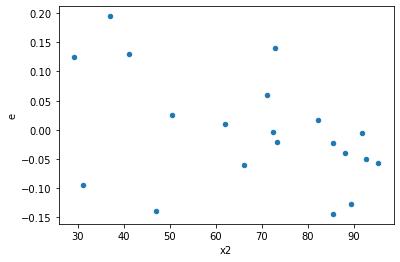

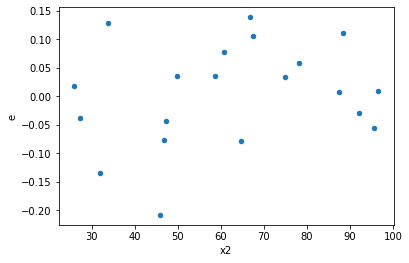

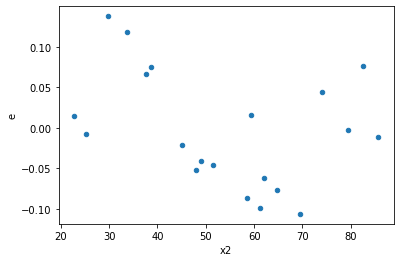

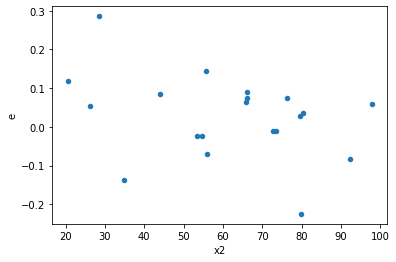

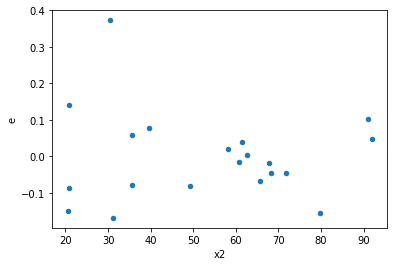

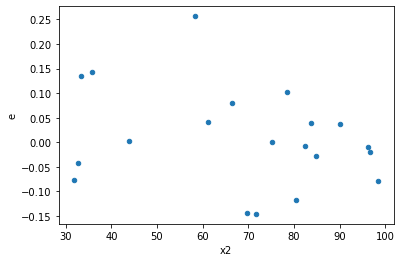

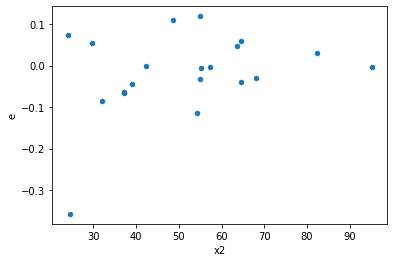

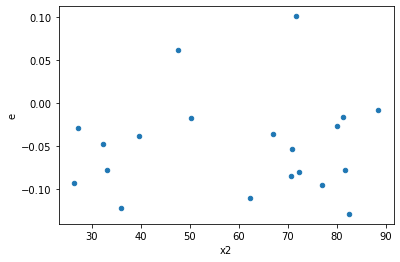

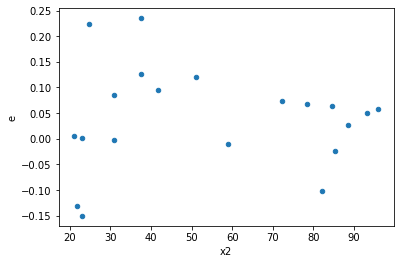

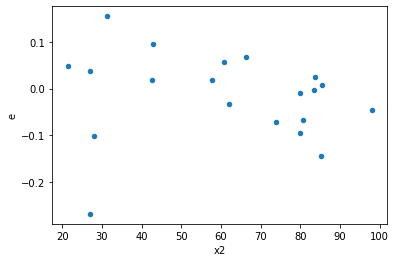

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,4.0,4.0,0.0019786391985590155,0.004776646636112466,0.0004946597996397539,0.0011941616590281166,2.4141069476391435,0.41423629391839056,0.7928818530408047,0.20711814695919528,Reject001=1 : Homoscedasticity
10.0,4.0,4.0,0.0339650442141539,0.035355306075932805,0.008491261053538476,0.008838826518983201,1.0409321375533365,0.9699206195122922,0.5150396902438539,0.4849603097561461,Reject001=1 : Homoscedasticity
12.0,4.0,4.0,0.028411663235899817,0.04811442989491737,0.007102915808974954,0.012028607473729342,1.6934745951135286,0.6223363866593576,0.6888318066703212,0.3111681933296788,Reject001=1 : Homoscedasticity
13.0,4.0,4.0,0.005434770193023599,0.010842049946638272,0.0013586925482558998,0.002710512486659568,1.9949417475932627,0.5200204244175834,0.7399897877912083,0.2600102122087917,Reject001=1 : Homoscedasticity
15.0,4.0,4.0,0.029603824414294936,0.1144163844713625,0.007400956103573734,0.028604096117840625,3.8649190344512965,0.21877260671174437,0.8906136966441278,0.10938630335587218,Reject001=1 : Homoscedasticity
19.0,4.0,4.0,0.008239394201394395,0.025348340873965553,0.0020598485503485987,0.006337085218491388,3.0764811410134647,0.3020130351382877,0.8489934824308562,0.15100651756914385,Reject001=1 : Homoscedasticity
21.0,4.0,4.0,0.02257245823511433,0.0235556371585062,0.005643114558778583,0.00588890928962655,1.0435565729328677,0.9680336886258214,0.5159831556870893,0.4840168443129107,Reject001=1 : Homoscedasticity
22.0,4.0,4.0,0.00649339425640909,0.038253664477315895,0.0016233485641022724,0.009563416119328974,5.8911661554446475,0.11412414097319834,0.9429379295134008,0.05706207048659917,Reject001=1 : Homoscedasticity
23.0,4.0,4.0,0.004519540829944074,0.025856252267331816,0.0011298852074860186,0.006464063066832954,5.72099096793684,0.11965118259411045,0.9401744087029448,0.059825591297055225,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.00466902147457951,0.0019353576711345257,0.0011672553686448775,0.00048383941778363143,0.4145103383378255,0.4145823255748719,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,0.008264744886152038,0.00317897508922988,0.0020661862215380095,0.00079474377230747,0.3846428574651348,0.3772635788816576,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,0.0019786391985590155,0.004776646636112466,0.0004946597996397539,0.0011941616590281166,2.4141069476391435,0.41423629391839056,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,0.02871393452820523,0.009238243857641246,0.007178483632051307,0.0023095609644103116,0.3217338205102707,0.2978216378482374,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,0.08306321904037983,0.02493435765141925,0.020765804760094958,0.006233589412854812,0.3001853039104807,0.27060225828672124,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,0.075576496625387,0.018619423608426788,0.01889412415634675,0.004654855902106697,0.24636526486161986,0.20354025778808038,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,0.022358757835366054,0.0020704649492849724,0.0055896894588415135,0.0005176162373212431,0.09260196673403771,0.04066385150627347,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,0.012835047714032377,0.006503896714788702,0.0032087619285080943,0.0016259741786971754,0.5067294535787416,0.5264761713861738,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,0.09791051268826065,0.028180929544847622,0.024477628172065162,0.007045232386211906,0.28782332735375904,0.25504780163571394,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      969
Reject001=0 : Heteroscedasticity     31
Name: Result_test, dtype: int64